# GraphSSL Demonstration

I recommend running the main pipeline using the command line interface or by running the shell script run_examples.sh. Here is a Jupyter notebook for compleness.

Train and evaluate graph representation learning models on OGBN-MAG dataset.

**Estimated Runtime**: ~10 hours on RTX 3060 (100 epochs)

## Setup

In [30]:
%pip install -e ..

Note: you may need to restart the kernel to use updated packages.


c:\Users\gabri\GTFO_Onedrive\DTU_Code\GraphSSL\.venv\Scripts\python.exe: No module named pip


In [31]:
import sys
import os
from pathlib import Path
from datetime import datetime
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

os.environ["WANDB_MODE"] = "disabled"
# Add project root to sys path just in case. It is recommended to install the project as a pip package by running the top block.
project_root = Path.cwd().parent if Path.cwd().name == 'scripts' else Path.cwd()
sys.path.insert(0, str(project_root / 'src'))

from graphssl.main import run_pipeline
from graphssl.utils.args_utils import parse_args
import wandb
wandb.init(mode="disabled")

print(f"PyTorch: {torch.__version__}")
print(f"CUDA: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch: 2.8.0+cu126
CUDA: True
GPU: NVIDIA GeForce RTX 3060


## Configuration

In [32]:
EXPERIMENT = "supervised_node"
# EXPERIMENT = "ssl_node_sce"
# EXPERIMENT = "ssl_node_mse"
# EXPERIMENT = "ssl_edge"
# EXPERIMENT = "ssl_tarpfp"

CONFIG = {
    "data_root": str(project_root / "data"),
    "results_root": str(project_root / "results" / f"demo_{EXPERIMENT}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"),
    "target_node": "paper",
    "target_edge_type": "paper,has_topic,field_of_study",
    "hidden_channels": 128,
    "num_layers": 2,
    "num_neighbors": [30, 30],
    "batch_size": 1024,
    "epochs": 10,
    "lr": 0.001,
    "dropout": 0.5,
    "patience": 5,
    "num_workers": 0,  # Set to 0 for Windows/Jupyter compatibility (multiprocessing issues)
    "weight_decay": 0,
    "log_interval": 10,
    "seed": 42,
    "edge_msg_pass_prop": [0, 0, 0],
    "extract_embeddings": True,
    "downstream_eval": True,
    "downstream_task": "both",
    "downstream_n_runs": 2,
    "downstream_hidden_dim": 128,
    "downstream_num_layers": 2,
    "downstream_dropout": 0.5,
    "multiclass_batch_size": 256,
    "downstream_node_epochs": 10,
    "downstream_link_epochs": 1,
    "downstream_patience": 4,
    "downstream_lr": 0.0001,
    # Defaults from parse_args
    "model_path": None,
    "preprocess": "metapath2vec",
    "metapath2vec_embeddings_path": "embedding.pt",
    "loss_fn": "mse",
    "mer_weight": 1.0,
    "tar_weight": 1.0,
    "pfp_weight": 1.0,
    "tar_temperature": 0.5,
    "mask_ratio": 0.5,
    "neg_sampling_ratio": 1.0,
    "aggr": "mean",
    "aggr_rel": "sum",
    "use_batchnorm": True,
    "node_inductive": True,
    "dependent_node_edge_data_split": True,
    "lambda_tar": 1.0,
    "lambda_pfp": 0.0,
    "disable_tqdm": False,
    "log_level": "INFO",
    "downstream_batch_size": 1024,
    "downstream_weight_decay": 0,
    "downstream_neg_samples": 1,
    "test_mode": False,
    "test_max_nodes": 5000,
}

# Experiment-Specific Parameters
if EXPERIMENT == "supervised_node":
    CONFIG.update({
        "objective_type": "supervised_node_classification",
        "use_feature_decoder": True,
        "use_edge_decoder": True,
    })
    
elif EXPERIMENT == "ssl_node_sce":
    CONFIG.update({
        "objective_type": "self_supervised_node",
        "loss_fn": "sce",
        "mask_ratio": 0.5,
        "use_feature_decoder": True,
        "use_edge_decoder": True,
        "patience": 20,
        "downstream_link_epochs": 3,
        "downstream_patience": 20,
    })
    
elif EXPERIMENT == "ssl_node_mse":
    CONFIG.update({
        "objective_type": "self_supervised_node",
        "loss_fn": "mse",
        "mask_ratio": 0.5,
        "use_feature_decoder": True,
        "use_edge_decoder": True,
    })
    
elif EXPERIMENT == "ssl_edge":
    CONFIG.update({
        "objective_type": "self_supervised_edge",
        "neg_sampling_ratio": 1.0,
        "use_feature_decoder": True,
        "use_edge_decoder": True,
    })
    
elif EXPERIMENT == "ssl_tarpfp":
    CONFIG.update({
        "objective_type": "self_supervised_tarpfp",
        "lambda_tar": 1.0,
        "lambda_pfp": 1.0,
        "mask_ratio": 0.5,
        "neg_sampling_ratio": 1.0,
        "tar_temperature": 0.5,
        "use_feature_decoder": True,
        "use_edge_decoder": True,
        "metapath2vec_embeddings_path": "pos_embedding.pt",
    })

print(f"Experiment: {EXPERIMENT}")
print(f"Objective: {CONFIG['objective_type']}")
print(f"Results will be saved to: {CONFIG['results_root']}")
print(f"\nEstimated runtime on RTX 3060: ~10 hours for {CONFIG['epochs']} epochs (with downstream evaluation)")

Experiment: supervised_node
Objective: supervised_node_classification
Results will be saved to: c:\Users\gabri\GTFO_Onedrive\DTU_Code\GraphSSL\results\demo_supervised_node_20251209_181035

Estimated runtime on RTX 3060: ~10 hours for 10 epochs (with downstream evaluation)


## Training
Run the main experiment pipeline

In [33]:
import argparse

args = argparse.Namespace(**CONFIG)
run_pipeline(args)

GraphSSL - Supervised Learning Pipeline
Task: Venue Prediction on OGB_MAG Dataset

Using device: cuda
GPU: NVIDIA GeForce RTX 3060
CUDA Version: 12.6

Step 1: Loading Dataset

Step 2: Creating Data Loaders

Step 2: Creating Data Loaders

Step 3: Creating Training Objective

Step 4: Creating Model

Step 3: Creating Training Objective

Step 4: Creating Model

Step 5: Setting up Optimizer

Step 6: Training Model

Step 5: Setting up Optimizer

Step 6: Training Model


Epoch   1/10 | Train Loss: 3.7959 | Train Acc: 0.1765 | Val Loss: 2.9739 | Val Acc: 0.2568 | Time: 82.46s


Epoch   2/10 | Train Loss: 3.1084 | Train Acc: 0.2492 | Val Loss: 2.8025 | Val Acc: 0.2944 | Time: 75.11s


Epoch   3/10 | Train Loss: 2.9889 | Train Acc: 0.2679 | Val Loss: 2.7160 | Val Acc: 0.3122 | Time: 75.85s


Epoch   4/10 | Train Loss: 2.9250 | Train Acc: 0.2804 | Val Loss: 2.6998 | Val Acc: 0.3177 | Time: 75.68s


Epoch   5/10 | Train Loss: 2.8895 | Train Acc: 0.2864 | Val Loss: 2.6441 | Val Acc: 0.3306 | Time: 75.30s


Epoch   6/10 | Train Loss: 2.8611 | Train Acc: 0.2918 | Val Loss: 2.6170 | Val Acc: 0.3355 | Time: 75.66s


Epoch   7/10 | Train Loss: 2.8395 | Train Acc: 0.2953 | Val Loss: 2.5982 | Val Acc: 0.3445 | Time: 75.89s


Epoch   8/10 | Train Loss: 2.8249 | Train Acc: 0.2979 | Val Loss: 2.5871 | Val Acc: 0.3459 | Time: 73.80s


Epoch   9/10 | Train Loss: 2.8119 | Train Acc: 0.2999 | Val Loss: 2.5667 | Val Acc: 0.3452 | Time: 73.93s


Epoch  10/10 | Train Loss: 2.7997 | Train Acc: 0.3016 | Val Loss: 2.5746 | Val Acc: 0.3493 | Time: 72.58s

Step 7: Testing Model



Step 8: Saving Results

Step 9: Extracting Embeddings


MemoryError: bad allocation

## Results

Train Loss: 2.7956
Val Loss: 2.5826
Best Val Acc: 0.3481


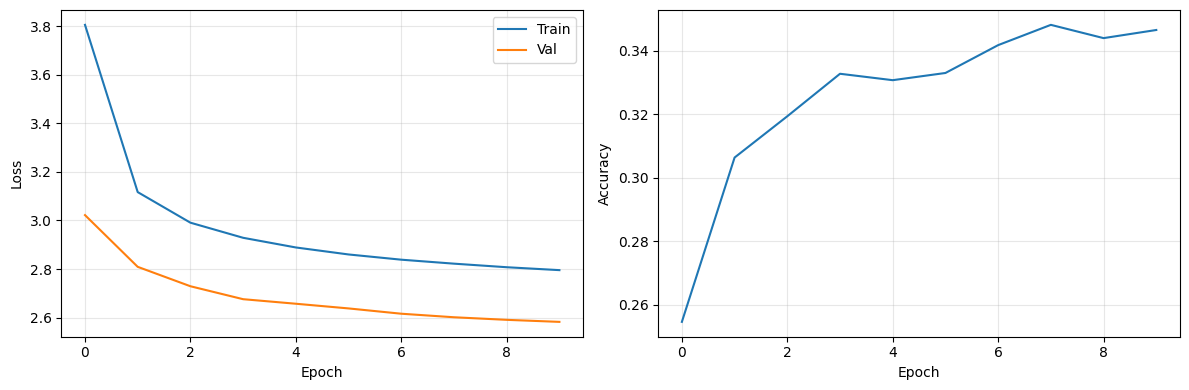

In [ ]:
results_dir = Path(CONFIG['results_root'])
history = torch.load(results_dir / "training_history.pt", weights_only=False)

if 'train_loss' in history:
    print(f"Train Loss: {history['train_loss'][-1]:.4f}")
    print(f"Val Loss: {history['val_loss'][-1]:.4f}")
if 'val_acc' in history:
    print(f"Best Val Acc: {max(history['val_acc']):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
if 'train_loss' in history:
    axes[0].plot(history['train_loss'], label='Train')
    axes[0].plot(history['val_loss'], label='Val')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
if 'val_acc' in history:
    axes[1].plot(history['val_acc'])
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Downstream Evaluation

Node Classification:
  Test Acc: 0.3473 ± 0.0001


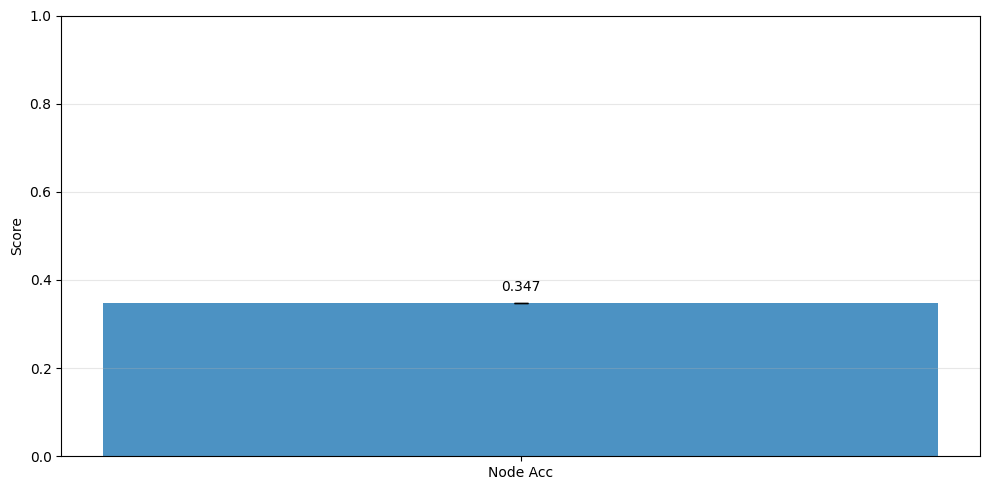

In [ ]:
all_results = {}
for file in results_dir.glob("downstream_*.pt"):
    task_name = file.stem.replace("downstream_", "")
    all_results[task_name] = torch.load(file, weights_only=False)

metrics, values, errors = [], [], []

if 'node_results' in all_results:
    r = all_results['node_results']
    print("Node Classification:")
    if 'test_acc_mean' in r:
        print(f"  Test Acc: {r['test_acc_mean']:.4f} ± {r['test_acc_std']:.4f}")
        metrics.append('Node Acc')
        values.append(float(r['test_acc_mean']))
        errors.append(float(r['test_acc_std']))
    if 'test_f1_mean' in r:
        print(f"  Test F1:  {r['test_f1_mean']:.4f} ± {r['test_f1_std']:.4f}")
        metrics.append('Node F1')
        values.append(float(r['test_f1_mean']))
        errors.append(float(r['test_f1_std']))

if 'link_results' in all_results:
    r = all_results['link_results']
    print("\nBinary Link Prediction:")
    if 'test_auc_mean' in r:
        print(f"  Test AUC: {r['test_auc_mean']:.4f} ± {r['test_auc_std']:.4f}")
        metrics.append('Link AUC')
        values.append(float(r['test_auc_mean']))
        errors.append(float(r['test_auc_std']))
    if 'test_ap_mean' in r:
        print(f"  Test AP:  {r['test_ap_mean']:.4f} ± {r['test_ap_std']:.4f}")
        metrics.append('Link AP')
        values.append(float(r['test_ap_mean']))
        errors.append(float(r['test_ap_std']))

if 'multiclass_link_results' in all_results:
    r = all_results['multiclass_link_results']
    print("\nMulti-Label Prediction:")
    if 'test_f1_micro_mean' in r:
        print(f"  Test F1 (micro): {r['test_f1_micro_mean']:.4f} ± {r['test_f1_micro_std']:.4f}")
        metrics.append('Multi-Label F1 (micro)')
        values.append(float(r['test_f1_micro_mean']))
        errors.append(float(r['test_f1_micro_std']))
    if 'test_f1_macro_mean' in r:
        print(f"  Test F1 (macro): {r['test_f1_macro_mean']:.4f} ± {r['test_f1_macro_std']:.4f}")
        metrics.append('Multi-Label F1 (macro)')
        values.append(float(r['test_f1_macro_mean']))
        errors.append(float(r['test_f1_macro_std']))

if metrics:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(metrics, values, yerr=errors, capsize=5, alpha=0.8)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.3, axis='y')
    for i, (v, e) in enumerate(zip(values, errors)):
        ax.text(i, v + e + 0.02, f'{v:.3f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
else:
    print("No downstream results found")